# Unsupervised Learning-Object Recognition

In [136]:
# data processing packages
import numpy as np
import pandas as pd

#visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Packages for data anlysis and Model Building
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm


#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

from sklearn.preprocessing import Imputer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 1. Reading and Checking the Data

In [4]:
vch_data=pd.read_csv("vehicle-1.csv")

In [5]:
vch_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [6]:
vch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [7]:
vch_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
#vch_data.iloc[:,0:18]=vch_data.iloc[:,0:18].replace(0,np.nan)

In [9]:
# using Simple Imputer to replace missing values

from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values = np.nan, strategy = 'median') # using median as startegy to deal with skewed data in most cases
#vch_X=vch_data.iloc[:, 0:19]

imp=imp.fit(vch_data.iloc[:,0:18])

vch_data.iloc[:, 0:18]=imp.transform(vch_data.iloc[:, 0:18])

In [10]:
vch_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [11]:
vch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

In [12]:
#vch_data.head(25)

In [13]:
# Shape of the dataframe (Rows, Column)
vch_data.shape
print(f"Shape of data: {vch_data.shape}")
print(f"Number of rows:= {vch_data.shape[0]}")
print(f"Number of Columns:= {vch_data.shape[1]}")
#d1.shape[1]

Shape of data: (846, 19)
Number of rows:= 846
Number of Columns:= 19


In [14]:
# five point summary of numerical data types
vch_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [15]:
# Undertanding variables of type Object to futher process them and replace with numeric values
car_type=vch_data.iloc[:,-1].unique()
print("car_type:\n",car_type)
#print("\n")

car_type:
 ['van' 'car' 'bus']


In [16]:
# creating data copy post missing value imputation for further processing
vch_data1=vch_data # will be using vch_data1 for further action model preparartion.

In [17]:
vch_data1.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,car
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [18]:
# Replace varaible of object type with numeric category

vch_data1.iloc[:,-1]=vch_data1.iloc[:,-1].replace({"van":1,"car":2,"bus":3})

In [19]:
vch_data1.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,1
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,1
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,2
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,1
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,3


# EDA

In [140]:
#sns.pairplot(vch_data1, diag_kind='kde')

In [21]:
def plot_corr(df, size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

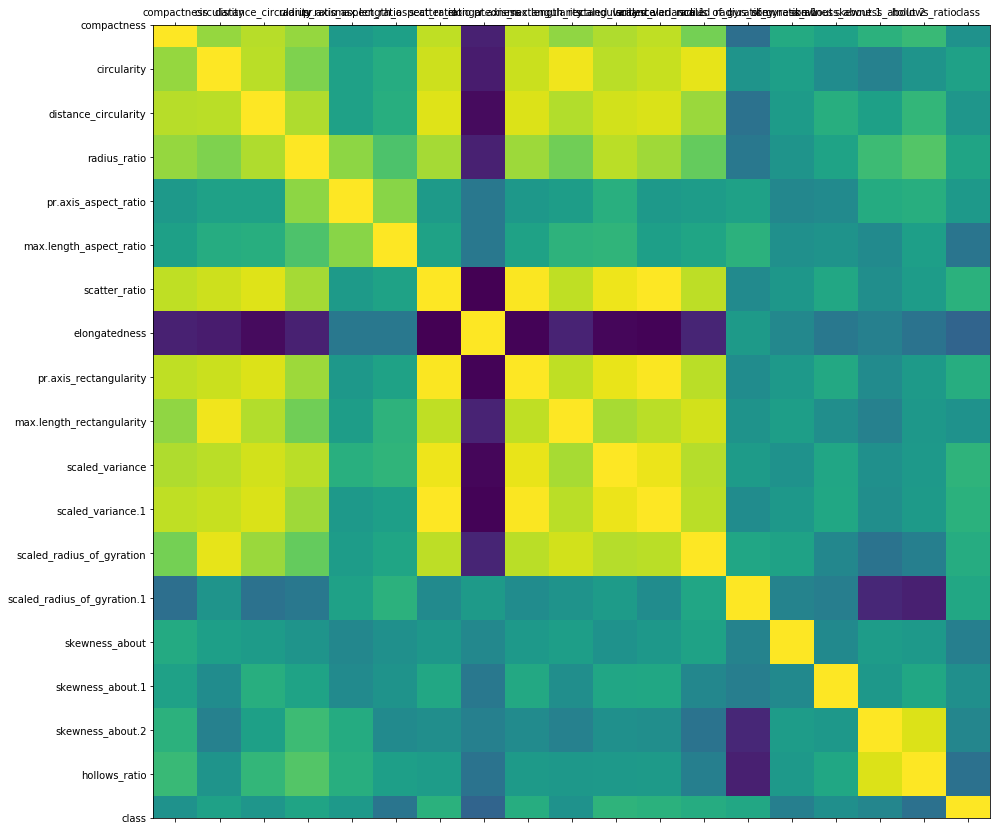

In [22]:
plot_corr(vch_data1)

In [23]:
vch_data1.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.684887,0.789928,0.689743,0.091534,0.148249,0.812620,-0.788750,0.813694,0.676143,0.762070,0.814012,0.585243,-0.249593,0.236078,0.157015,0.298537,0.365552,0.033796
circularity,0.684887,1.000000,0.792320,0.620912,0.153778,0.251467,0.847938,-0.821472,0.843400,0.961318,0.796306,0.835946,0.925816,0.051946,0.144198,-0.011439,-0.104426,0.046351,0.158910
distance_circularity,0.789928,0.792320,1.000000,0.767035,0.158456,0.264686,0.905076,-0.911307,0.893025,0.774527,0.861519,0.886017,0.705771,-0.225944,0.113924,0.265547,0.146098,0.332732,0.064467
radius_ratio,0.689743,0.620912,0.767035,1.000000,0.663447,0.450052,0.734429,-0.789481,0.708385,0.568949,0.793415,0.718436,0.536372,-0.180397,0.048713,0.173741,0.382214,0.471309,0.182186
pr.axis_aspect_ratio,0.091534,0.153778,0.158456,0.663447,1.000000,0.648724,0.103732,-0.183035,0.079604,0.126909,0.272910,0.089189,0.121971,0.152950,-0.058371,-0.031976,0.239886,0.267725,0.098178
max.length_aspect_ratio,0.148249,0.251467,0.264686,0.450052,0.648724,1.000000,0.166191,-0.180140,0.161502,0.305943,0.318957,0.143253,0.189743,0.295735,0.015599,0.043422,-0.026081,0.143919,-0.207619
scatter_ratio,0.812620,0.847938,0.905076,0.734429,0.103732,0.166191,1.000000,-0.971601,0.989751,0.809083,0.948662,0.993012,0.799875,-0.027542,0.074458,0.212428,0.005628,0.118817,0.288895
elongatedness,-0.788750,-0.821472,-0.911307,-0.789481,-0.183035,-0.180140,-0.971601,1.000000,-0.948996,-0.775854,-0.936382,-0.953816,-0.766314,0.103302,-0.052600,-0.185053,-0.115126,-0.216905,-0.339344
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.708385,0.079604,0.161502,0.989751,-0.948996,1.000000,0.810934,0.934227,0.988213,0.796690,-0.015495,0.083767,0.214700,-0.018649,0.099286,0.258481
max.length_rectangularity,0.676143,0.961318,0.774527,0.568949,0.126909,0.305943,0.809083,-0.775854,0.810934,1.000000,0.744985,0.794615,0.866450,0.041622,0.135852,0.001366,-0.103948,0.076770,0.032399


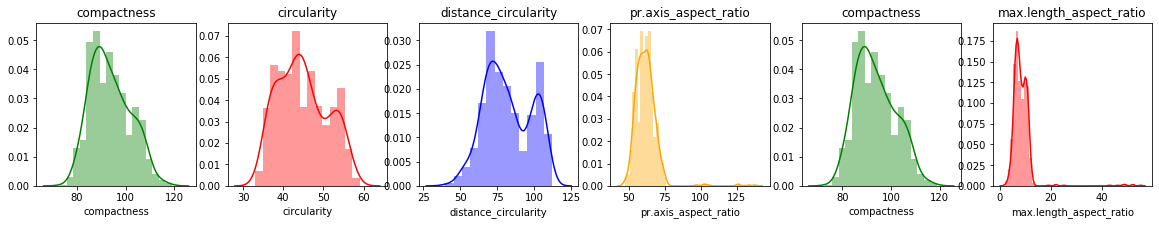

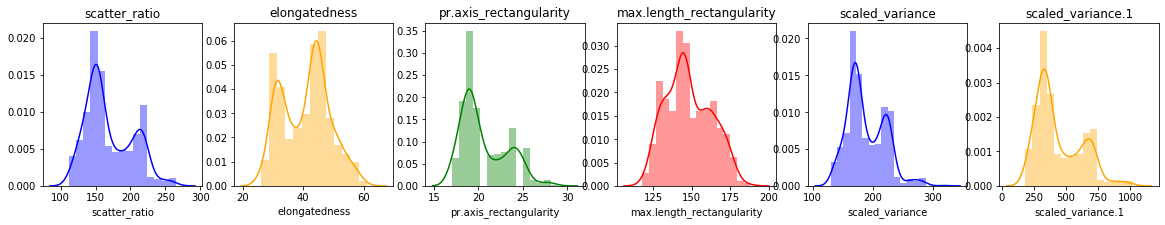

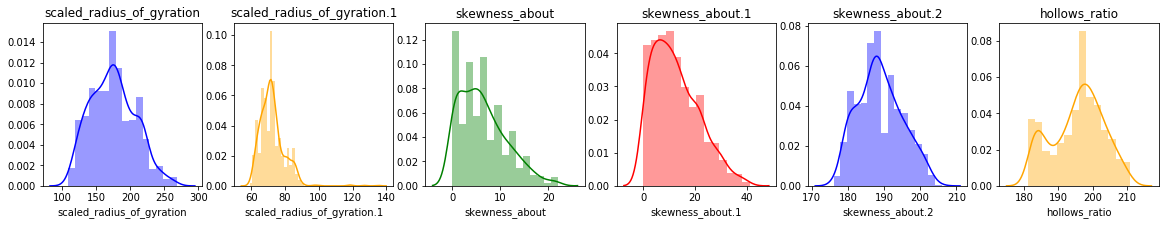

In [32]:
# Univariate analysis - distplot

plt.figure(figsize=(20,3))
plt.subplot(1,6,1)
plt.title('compactness')
sns.distplot(vch_data1['compactness'],color='green')

plt.subplot(1,6,2)
plt.title('circularity')
sns.distplot(vch_data1['circularity'],color='red')

plt.subplot(1,6,3)
plt.title('distance_circularity')
sns.distplot(vch_data1['distance_circularity'],color='blue')

plt.subplot(1,6,4)
plt.title('pr.axis_aspect_ratio')
sns.distplot(vch_data1['pr.axis_aspect_ratio'],color='orange')

plt.subplot(1,6,5)
plt.title('compactness')
sns.distplot(vch_data1['compactness'],color='green')

plt.subplot(1,6,6)
plt.title('max.length_aspect_ratio')
sns.distplot(vch_data1['max.length_aspect_ratio'],color='red')

#-------------------------------------------------------------------

plt.figure(figsize=(20,3))

plt.subplot(1,6,1)
plt.title('scatter_ratio')
sns.distplot(vch_data1['scatter_ratio'],color='blue')

plt.subplot(1,6,2)
plt.title('elongatedness')
sns.distplot(vch_data1['elongatedness'],color='orange')

plt.subplot(1,6,3)
plt.title('pr.axis_rectangularity')
sns.distplot(vch_data1['pr.axis_rectangularity'],color='green')

plt.subplot(1,6,4)
plt.title('max.length_rectangularity')
sns.distplot(vch_data1['max.length_rectangularity'],color='red')

plt.subplot(1,6,5)
plt.title('scaled_variance')
sns.distplot(vch_data1['scaled_variance'],color='blue')

plt.subplot(1,6,6)
plt.title('scaled_variance.1')
sns.distplot(vch_data1['scaled_variance.1'],color='orange')
#-------------------------------------------------------------------

plt.figure(figsize=(20,3))

plt.subplot(1,6,1)
plt.title('scaled_radius_of_gyration')
sns.distplot(vch_data1['scaled_radius_of_gyration'],color='blue')

plt.subplot(1,6,2)
plt.title('scaled_radius_of_gyration.1')
sns.distplot(vch_data1['scaled_radius_of_gyration.1'],color='orange')

plt.subplot(1,6,3)
plt.title('skewness_about')
sns.distplot(vch_data1['skewness_about'],color='green')

plt.subplot(1,6,4)
plt.title('skewness_about.1')
sns.distplot(vch_data1['skewness_about.1'],color='red')

plt.subplot(1,6,5)
plt.title('skewness_about.2')
sns.distplot(vch_data1['skewness_about.2'],color='blue')

plt.subplot(1,6,6)
plt.title('hollows_ratio')
sns.distplot(vch_data1['hollows_ratio'],color='orange')

# Understanding Target Column Class ( Type of Van)

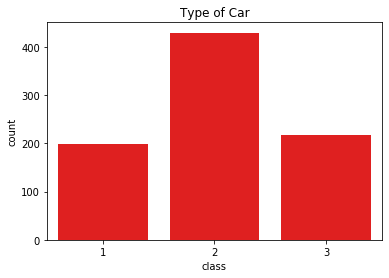

In [35]:
plt.title('Type of Car')
sns.countplot(vch_data1['class'],orient='vertical',color='red')

In [141]:
# check for data imbalance
prop_Y = vch_data1['class'].value_counts(normalize=True)
print(prop_Y)

2    0.507092
3    0.257683
1    0.235225
Name: class, dtype: float64


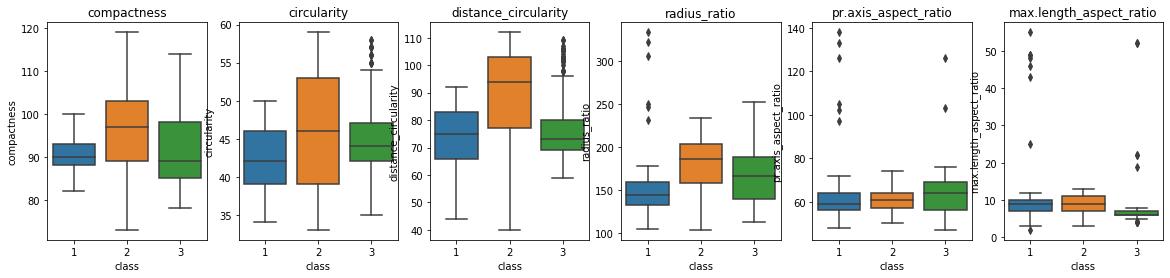

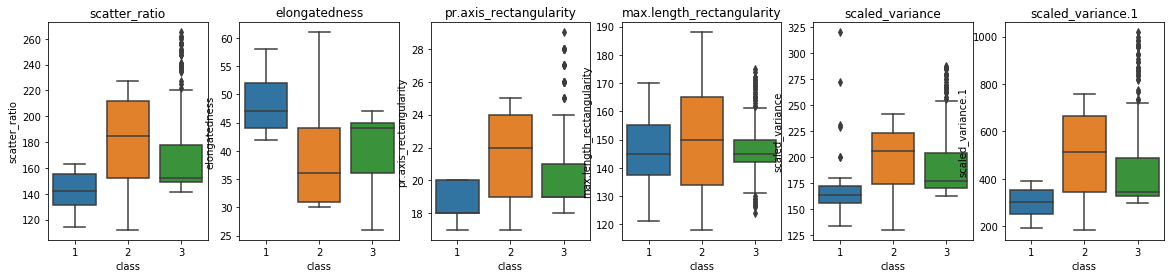

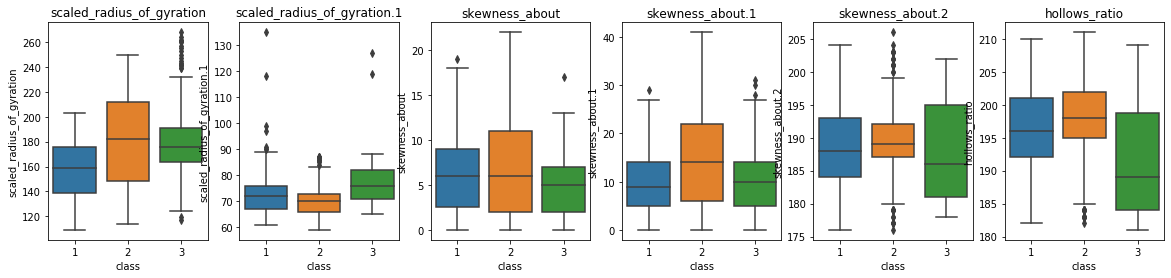

In [40]:
plt.figure(figsize=(20,4))
plt.subplot(1,6,1)
plt.title('compactness')
sns.boxplot(x='class',y='compactness',data=vch_data1)

plt.subplot(1,6,2)
plt.title('circularity')
sns.boxplot(x='class',y='circularity',data=vch_data1)


plt.subplot(1,6,3)
plt.title('distance_circularity')
sns.boxplot(x='class',y='distance_circularity',data=vch_data1)

plt.subplot(1,6,4)
plt.title('radius_ratio')
sns.boxplot(x='class',y='radius_ratio',data=vch_data1)

plt.subplot(1,6,5)
plt.title('pr.axis_aspect_ratio')
sns.boxplot(x='class',y='pr.axis_aspect_ratio',data=vch_data1)

plt.subplot(1,6,6)
plt.title('max.length_aspect_ratio')
sns.boxplot(x='class',y='max.length_aspect_ratio',data=vch_data1)

#---------------------------------------------------------------
plt.figure(figsize=(20,4))
plt.subplot(1,6,1)
plt.title('scatter_ratio')
sns.boxplot(x='class',y='scatter_ratio',data=vch_data1)

plt.subplot(1,6,2)
plt.title('elongatedness')
sns.boxplot(x='class',y='elongatedness',data=vch_data1)


plt.subplot(1,6,3)
plt.title('pr.axis_rectangularity')
sns.boxplot(x='class',y='pr.axis_rectangularity',data=vch_data1)

plt.subplot(1,6,4)
plt.title('max.length_rectangularity')
sns.boxplot(x='class',y='max.length_rectangularity',data=vch_data1)

plt.subplot(1,6,5)
plt.title('scaled_variance')
sns.boxplot(x='class',y='scaled_variance',data=vch_data1)

plt.subplot(1,6,6)
plt.title('scaled_variance.1')
sns.boxplot(x='class',y='scaled_variance.1',data=vch_data1)

#-------------------------------------------------------------

plt.figure(figsize=(20,4))
plt.subplot(1,6,1)
plt.title('scaled_radius_of_gyration')
sns.boxplot(x='class',y='scaled_radius_of_gyration',data=vch_data1)

plt.subplot(1,6,2)
plt.title('scaled_radius_of_gyration.1')
sns.boxplot(x='class',y='scaled_radius_of_gyration.1',data=vch_data1)


plt.subplot(1,6,3)
plt.title('skewness_about')
sns.boxplot(x='class',y='skewness_about',data=vch_data1)

plt.subplot(1,6,4)
plt.title('skewness_about.1')
sns.boxplot(x='class',y='skewness_about.1',data=vch_data1)

plt.subplot(1,6,5)
plt.title('skewness_about.2')
sns.boxplot(x='class',y='skewness_about.2',data=vch_data1)

plt.subplot(1,6,6)
plt.title('hollows_ratio')
sns.boxplot(x='class',y='hollows_ratio',data=vch_data1)


# Inference from Box Plot

In [51]:
#dropping/ignoring car_name  and origin
X_vch_data1 = vch_data1.iloc[:,0:18]
Y_vch_data1= vch_data1.iloc[:,-1]

In [53]:
X_vch_data1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0


In [52]:
Y_vch_data1.head()

0    1
1    1
2    2
3    1
4    3
Name: class, dtype: int64

# Feature selection based on correlation inference

In [54]:
# dropping the variables which have high correlation which may lead to collienarity effects

X_vch_data1_F1 = X_vch_data1.drop(["circularity","scatter_ratio","elongatedness",
                                   "pr.axis_rectangularity","max.length_rectangularity",
                                  "scaled_variance"],axis=1)

In [56]:
X_vch_data1_F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 12 columns):
compactness                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio                  846 non-null float64
dtypes: float64(12)
memory usage: 79.4 KB


# Splitting the data

In [142]:
X1=X_vch_data1
X=X_vch_data1_F1
Y=Y_vch_data1

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=1)

In [143]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=.30, random_state=1)

# Training:  Support Vector Machine - Model

In [76]:
clf_svm = svm.SVC(gamma=0.025, C=3)

In [144]:
clf_svm.fit(X1_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
clf_svm.fit(X_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [145]:
y1_pred = clf_svm.predict(X1_test)

In [146]:
from sklearn.metrics import classification_report,confusion_matrix
matrix_test = confusion_matrix(y1_test,y1_pred)
print("confusion matrix = \n",matrix_test,"\n")
matrix_test = classification_report(y1_test,y1_pred)
print("classification_report = \n",matrix_test)

confusion matrix = 
 [[  2  60   0]
 [  0 133   0]
 [  0  58   1]] 

classification_report = 
               precision    recall  f1-score   support

           1       1.00      0.03      0.06        62
           2       0.53      1.00      0.69       133
           3       1.00      0.02      0.03        59

    accuracy                           0.54       254
   macro avg       0.84      0.35      0.26       254
weighted avg       0.75      0.54      0.39       254



In [78]:
y_pred = clf_svm.predict(X_test)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix
matrix_test = confusion_matrix(y_test,y_pred)
print("confusion matrix = \n",matrix_test,"\n")
matrix_test = classification_report(y_test,y_pred)
print("classification_report = \n",matrix_test)

confusion matrix = 
 [[  4  58   0]
 [  0 133   0]
 [  0  55   4]] 

classification_report = 
               precision    recall  f1-score   support

           1       1.00      0.06      0.12        62
           2       0.54      1.00      0.70       133
           3       1.00      0.07      0.13        59

    accuracy                           0.56       254
   macro avg       0.85      0.38      0.32       254
weighted avg       0.76      0.56      0.43       254



# Compare SVM model : Raw data vs reduced variable

Comparing accuracy scores for the svm model with  raw data vs reduced features, it is observed that even after reducing 6 variables the accuracy score has improved from 0.54 to 0.56 which indicates that information is not lost even after dropping few variables based on correlation inference.

# K- Fold cross validation

In [137]:
num_folds = 50
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(clf_svm, X, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.23529412 0.52941176 0.47058824 0.47058824 0.47058824 0.47058824
 0.52941176 0.35294118 0.64705882 0.70588235 0.35294118 0.64705882
 0.47058824 0.47058824 0.52941176 0.58823529 0.35294118 0.29411765
 0.52941176 0.52941176 0.64705882 0.58823529 0.58823529 0.52941176
 0.64705882 0.70588235 0.41176471 0.58823529 0.70588235 0.76470588
 0.76470588 0.47058824 0.52941176 0.76470588 0.70588235 0.58823529
 0.58823529 0.58823529 0.64705882 0.52941176 0.41176471 0.64705882
 0.64705882 0.35294118 0.58823529 0.52941176 0.625      0.5625
 0.75       0.5       ]
Accuracy: 55.228% (12.387%)


# PCA : Principal Components Analysis

In [120]:
# converting to unitless scaled data using standard - scalar (zscore) as 
# standard -scalar is being used as all variables are not following standard guassian behaviour and is most cases are skewed or multimodal
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,compactness,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.057177,0.273363,1.310398,0.311542,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,0.120741,-0.835032,-0.593753,0.094079,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,1.519141,1.202018,0.548738,0.311542,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.006386,-0.295813,0.167907,0.094079,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.769150,1.082192,5.245643,9.444962,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


In [121]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.79086299  0.69055952  0.09164265  0.14842463  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.79086299  1.00118343  0.76794246  0.15864319  0.26499957  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.76794246  1.00118343  0.66423242  0.45058426  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15864319  0.66423242  1.00118343  0.64949139  0.08929427
   0.12211524  0.15313091 -0.05843967 -0.0320139   0.24016968  0.26804208]
 [ 0.14842463  0.26499957  0.45058426  0.64949139  1.00118343  0.1434227
   0.18996732  0.29608463  0.01561769  0.04347324 -0.02611148  0.14408905]
 [ 0.81497566  0.88706577  0.71928618  0.08929427  0.1434227   1.00118343
   0.79595778 -0.01541878  0.07696823  0.20104818  0.00622636  0.10305714]
 [ 0.58593517  0.70660663  0.53700678  0.12211524  0.18996732  0.79595778
   1.00118343  0.19169941  0.1666

In [122]:
# starting to build PCA with n_components as 10 
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [123]:
print(pca.explained_variance_)

[4.47344411 2.67863795 1.79498936 1.0897066  0.8892759  0.40035264
 0.28945336 0.16748959 0.10736577 0.05668763]


In [124]:
print(pca.explained_variance_ratio_)

[0.37234636 0.22295598 0.14940564 0.09070154 0.07401873 0.03332328
 0.0240926  0.01394097 0.00893657 0.00471839]


In [125]:
print(pca.components_)

[[-4.05979286e-01 -4.27277475e-01 -4.34718317e-01 -1.91303924e-01
  -1.73126089e-01 -3.92958032e-01 -3.00985818e-01  1.51637064e-01
  -8.51585303e-02 -1.15742315e-01 -1.99565956e-01 -2.61892770e-01]
 [ 4.41022189e-02  1.19053319e-01  2.78180546e-02  2.30115673e-02
   1.56005819e-01  2.39433441e-01  3.68706905e-01  5.11634329e-01
  -2.53620673e-02 -7.49176000e-02 -5.13964422e-01 -4.82474827e-01]
 [-2.12669137e-01 -1.57231977e-01  2.08810537e-01  6.35320431e-01
   5.54362985e-01 -2.26643798e-01 -1.64323167e-01  2.19041594e-01
  -1.62919635e-01 -8.53602607e-02  7.88456848e-02  9.54105718e-02]
 [ 7.49498225e-02 -1.05116242e-01 -2.92036329e-02  6.29174108e-02
   2.11286138e-02 -9.30047673e-02  1.56467072e-01 -1.09054453e-02
   6.64609792e-01 -7.00347715e-01  1.12272375e-01  5.12682957e-03]
 [-1.24026931e-02 -1.93463471e-02 -8.98221947e-02 -2.69842453e-02
   2.36104689e-01 -1.00744463e-01 -1.34287445e-01  1.27972663e-01
   6.92637308e-01  6.35440647e-01 -8.27010412e-02  7.82218480e-05]
 [ 8.

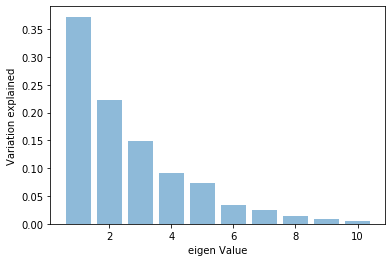

In [126]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

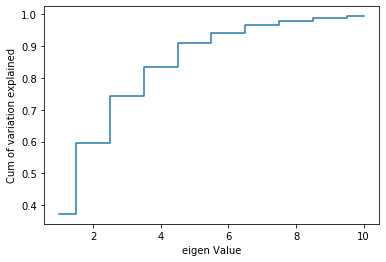

In [127]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction using PCA with 95% variance

6 dimensions seems very reasonable. With 6 variables we can explain ~95% of the variation in the original data!

In [128]:
pca6 = PCA(n_components=6)
pca6.fit(XScaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(XScaled)

[[-4.05979286e-01 -4.27277475e-01 -4.34718317e-01 -1.91303924e-01
  -1.73126089e-01 -3.92958032e-01 -3.00985818e-01  1.51637064e-01
  -8.51585303e-02 -1.15742315e-01 -1.99565956e-01 -2.61892770e-01]
 [ 4.41022189e-02  1.19053319e-01  2.78180546e-02  2.30115673e-02
   1.56005819e-01  2.39433441e-01  3.68706905e-01  5.11634329e-01
  -2.53620673e-02 -7.49176000e-02 -5.13964422e-01 -4.82474827e-01]
 [-2.12669137e-01 -1.57231977e-01  2.08810537e-01  6.35320431e-01
   5.54362985e-01 -2.26643798e-01 -1.64323167e-01  2.19041594e-01
  -1.62919635e-01 -8.53602607e-02  7.88456848e-02  9.54105718e-02]
 [ 7.49498225e-02 -1.05116242e-01 -2.92036329e-02  6.29174108e-02
   2.11286138e-02 -9.30047673e-02  1.56467072e-01 -1.09054453e-02
   6.64609792e-01 -7.00347715e-01  1.12272375e-01  5.12682957e-03]
 [-1.24026931e-02 -1.93463471e-02 -8.98221947e-02 -2.69842453e-02
   2.36104689e-01 -1.00744463e-01 -1.34287445e-01  1.27972663e-01
   6.92637308e-01  6.35440647e-01 -8.27010412e-02  7.82218480e-05]
 [ 8.

In [129]:
Xpca6

array([[-5.38048452e-01,  1.19659377e-03,  9.50486425e-01,
        -1.82738844e-01,  1.81451064e-01, -3.64824960e-01],
       [ 7.44688185e-01, -6.41108392e-01, -2.94183197e-01,
         1.81667462e-01,  7.10231332e-01,  6.64320381e-01],
       [-2.75265749e+00,  1.19164175e+00, -4.23746632e-01,
         1.35614192e+00,  4.52288360e-01, -2.22166491e-01],
       ...,
       [-2.93954740e+00,  7.88524509e-01,  3.44991447e-01,
         1.62032687e-01, -1.39552654e+00,  4.64194858e-01],
       [ 1.36672370e+00, -1.24988080e+00, -1.27137040e-01,
        -1.90529064e+00,  7.57861157e-02,  1.81868720e-01],
       [ 2.99771952e+00, -5.21024554e-01, -3.24232838e-01,
        -1.30028192e+00, -1.84045735e-02,  6.11018213e-02]])

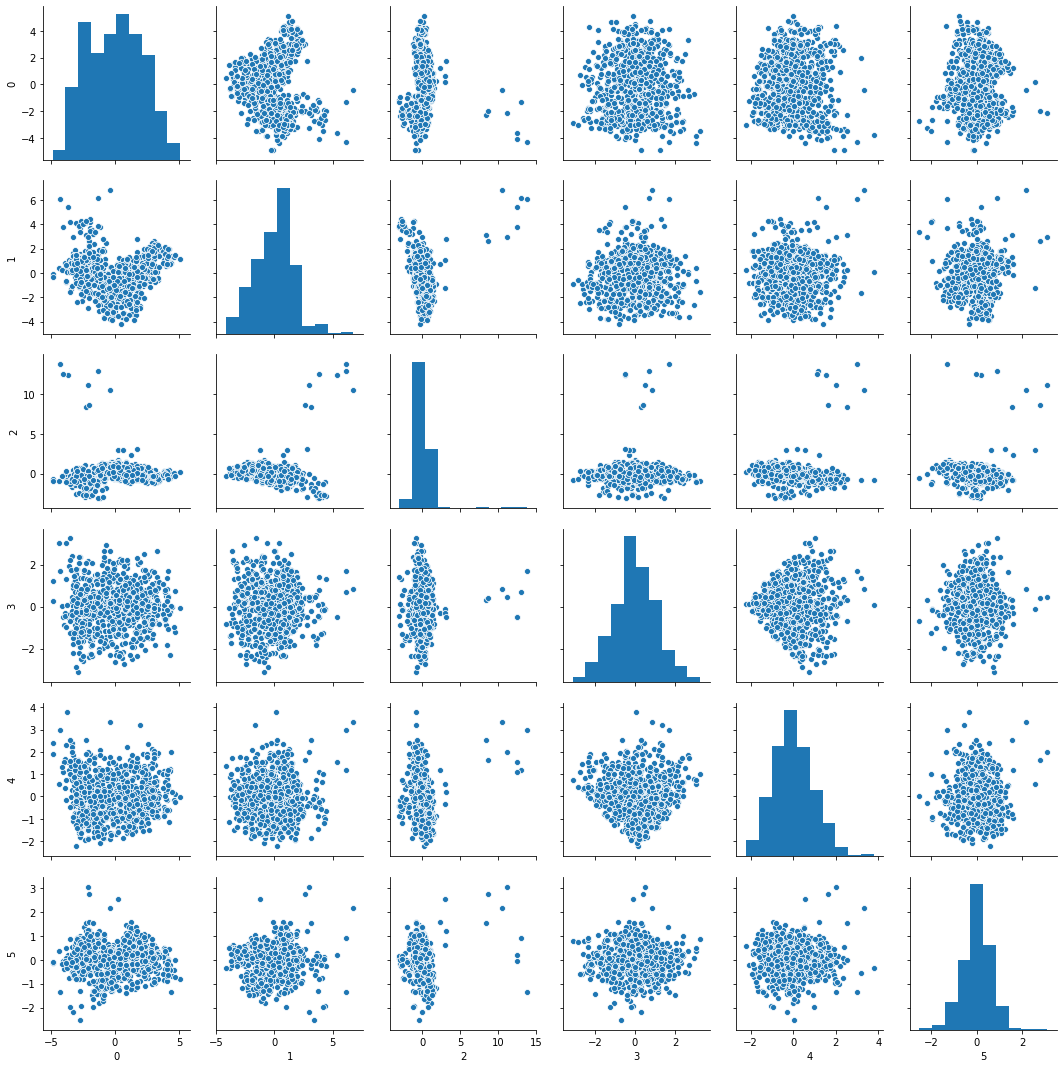

In [130]:
sns.pairplot(pd.DataFrame(Xpca6))

In [131]:
X_train_p6, X_test_p6, y_train_p6, y_test_p6 = train_test_split(Xpca6, Y, test_size=.30, random_state=1)

In [132]:
clf_svm_p6 = svm.SVC(gamma=0.025, C=3)

In [133]:
# Creating SVM model with 6 PCA componenets to check if there is improvement is model accuracy 
clf_svm_p6.fit(X_train_p6,y_train_p6) 

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [134]:
y_pred = clf_svm_p6.predict(X_test_p6)

In [135]:
from sklearn.metrics import classification_report,confusion_matrix
matrix_test = confusion_matrix(y_test_p6,y_pred)
print("confusion matrix = \n",matrix_test,"\n")
matrix_test = classification_report(y_test_p6,y_pred)
print("classification_report = \n",matrix_test)

confusion matrix = 
 [[ 47  12   3]
 [ 13 116   4]
 [  2   3  54]] 

classification_report = 
               precision    recall  f1-score   support

           1       0.76      0.76      0.76        62
           2       0.89      0.87      0.88       133
           3       0.89      0.92      0.90        59

    accuracy                           0.85       254
   macro avg       0.84      0.85      0.85       254
weighted avg       0.85      0.85      0.85       254



# Inference of SVM Model with PCA componenets

As observed model accuracy improved significatly from 0.56 to 0.85 with PCA componenets. Hence PCA has helped in further reducing the number of variables and thus improving the model accuracy

# K fold validation for SVM-PCA model

In [138]:
num_folds = 50
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(clf_svm_p6, Xpca6, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.94117647 0.76470588 0.82352941 0.94117647 0.94117647 0.88235294
 1.         0.94117647 0.88235294 0.94117647 0.94117647 1.
 0.88235294 0.82352941 0.94117647 1.         0.82352941 0.76470588
 0.82352941 0.82352941 0.76470588 0.88235294 0.82352941 0.88235294
 0.82352941 0.88235294 0.88235294 0.82352941 1.         0.94117647
 0.88235294 0.94117647 0.70588235 0.94117647 0.76470588 0.70588235
 0.94117647 0.82352941 0.94117647 0.82352941 0.82352941 1.
 1.         0.82352941 0.82352941 0.94117647 0.75       0.75
 0.875      0.9375    ]
Accuracy: 87.566% (8.081%)


In [148]:
#Append the prediction
prediction=clf_svm_p6.predict(Xpca6)

#Append the prediction 
vch_data1["class_pred"] = prediction
print("With Predicted Class : \n")
vch_data1

With Predicted Class : 



,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,class_pred
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,1,1
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,1,1
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,2,2
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,1,1
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0,2,2
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0,1,1
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0,2,2
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0,2,2
